In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import io
%cd "C:\Users\Lenovo\OneDrive\Documents\python files\Internship"

C:\Users\Lenovo\OneDrive\Documents\python files\Internship


In [4]:
medicdata=pd.read_csv("Medicare_Physician_Other_Practitioners_by_Geography_and_Service_2019.csv",low_memory=False)

In [5]:
medicdata.shape

(273211, 15)

In [6]:
medicdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273211 entries, 0 to 273210
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Rndrng_Prvdr_Geo_Lvl   273211 non-null  object
 1   Rndrng_Prvdr_Geo_Cd    260217 non-null  object
 2   Rndrng_Prvdr_Geo_Desc  273211 non-null  object
 3   HCPCS_Cd               273211 non-null  object
 4   HCPCS_Desc             273211 non-null  object
 5   HCPCS_Drug_Ind         273211 non-null  object
 6   Place_Of_Srvc          273211 non-null  object
 7   Tot_Rndrng_Prvdrs      273211 non-null  object
 8   Tot_Benes              273211 non-null  object
 9   Tot_Srvcs              273211 non-null  object
 10  Tot_Bene_Day_Srvcs     273211 non-null  object
 11  Avg_Sbmtd_Chrg         273211 non-null  object
 12  Avg_Mdcr_Alowd_Amt     273211 non-null  object
 13  Avg_Mdcr_Pymt_Amt      273211 non-null  object
 14  Avg_Mdcr_Stdzd_Amt     273211 non-null  object
dtype

In [7]:
medicdata.describe()

,Rndrng_Prvdr_Geo_Lvl,Rndrng_Prvdr_Geo_Cd,Rndrng_Prvdr_Geo_Desc,HCPCS_Cd,HCPCS_Desc,HCPCS_Drug_Ind,Place_Of_Srvc,Tot_Rndrng_Prvdrs,Tot_Benes,Tot_Srvcs,Tot_Bene_Day_Srvcs,Avg_Sbmtd_Chrg,Avg_Mdcr_Alowd_Amt,Avg_Mdcr_Pymt_Amt,Avg_Mdcr_Stdzd_Amt
count,273211,260217,273211,273211,273211,273211,273211,273211,273211,273211,273211,273211,273211,273211,273211
unique,2,61,62,8853,7818,2,2,5518,20954,30138,24732,152040,81023,71671,71160
top,State,06,National,99214,Flow cytometry technique for DNA or cell analysis,N,F,11,11,15,13,$50.00,$38.21,$38.21,$38.21
freq,260217,8893,12994,121,368,260701,149325,6637,6123,3325,3568,99,334,338,836


In [8]:
medicdata.isnull().sum().sort_values(ascending=False)

Rndrng_Prvdr_Geo_Cd      12994
Rndrng_Prvdr_Geo_Lvl         0
Rndrng_Prvdr_Geo_Desc        0
HCPCS_Cd                     0
HCPCS_Desc                   0
HCPCS_Drug_Ind               0
Place_Of_Srvc                0
Tot_Rndrng_Prvdrs            0
Tot_Benes                    0
Tot_Srvcs                    0
Tot_Bene_Day_Srvcs           0
Avg_Sbmtd_Chrg               0
Avg_Mdcr_Alowd_Amt           0
Avg_Mdcr_Pymt_Amt            0
Avg_Mdcr_Stdzd_Amt           0
dtype: int64

In [9]:
medicdata.Rndrng_Prvdr_Geo_Cd=medicdata.Rndrng_Prvdr_Geo_Cd.fillna("9999")

In [10]:
floattype=medicdata[["Avg_Sbmtd_Chrg","Avg_Mdcr_Alowd_Amt","Avg_Mdcr_Pymt_Amt","Avg_Mdcr_Stdzd_Amt","Tot_Srvcs"]]

In [11]:
inttype=medicdata[["Tot_Rndrng_Prvdrs","Tot_Benes","Tot_Bene_Day_Srvcs"]]

In [12]:
floattype.Avg_Mdcr_Alowd_Amt=floattype.Avg_Mdcr_Alowd_Amt.str.replace("$"," ")

In [13]:
floattype.Avg_Mdcr_Alowd_Amt=floattype.Avg_Mdcr_Alowd_Amt.str.replace(",","")

In [14]:
floattype.Avg_Mdcr_Pymt_Amt=floattype.Avg_Mdcr_Pymt_Amt.str.replace("$"," ")

In [15]:
floattype.Avg_Mdcr_Pymt_Amt=floattype.Avg_Mdcr_Pymt_Amt.str.replace(",","")

In [16]:
floattype.Avg_Mdcr_Stdzd_Amt=floattype.Avg_Mdcr_Stdzd_Amt.str.replace("$"," ")

In [17]:
floattype.Avg_Mdcr_Stdzd_Amt=floattype.Avg_Mdcr_Stdzd_Amt.str.replace(",","")

In [18]:
floattype.Avg_Sbmtd_Chrg=floattype.Avg_Sbmtd_Chrg.str.replace("$"," ")

In [19]:
floattype.Avg_Sbmtd_Chrg=floattype.Avg_Sbmtd_Chrg.str.replace(",","")

In [20]:
floattype.Tot_Srvcs=floattype.Tot_Srvcs.str.replace(",","")

In [21]:
inttype.Tot_Bene_Day_Srvcs=inttype.Tot_Bene_Day_Srvcs.str.replace(",","")

In [22]:
inttype.Tot_Benes=inttype.Tot_Benes.str.replace(",","")

In [23]:
inttype.Tot_Rndrng_Prvdrs=inttype.Tot_Rndrng_Prvdrs.str.replace(",","")

In [24]:
floattype.Avg_Mdcr_Alowd_Amt=floattype.Avg_Mdcr_Alowd_Amt.astype("float64")

In [25]:
floattype.Avg_Mdcr_Pymt_Amt=floattype.Avg_Mdcr_Pymt_Amt.astype("float64")

In [26]:
floattype.Avg_Mdcr_Stdzd_Amt=floattype.Avg_Mdcr_Stdzd_Amt.astype("float64")

In [27]:
floattype.Avg_Sbmtd_Chrg=floattype.Avg_Sbmtd_Chrg.astype("float64")

In [28]:
floattype.Tot_Srvcs=floattype.Tot_Srvcs.astype("float64")

In [29]:
inttype.Tot_Bene_Day_Srvcs=inttype.Tot_Bene_Day_Srvcs.astype("int32")

In [30]:
inttype.Tot_Benes=inttype.Tot_Benes.astype("int32")

In [31]:
inttype.Tot_Rndrng_Prvdrs=inttype.Tot_Rndrng_Prvdrs.astype("int32")

<AxesSubplot:ylabel='Frequency'>

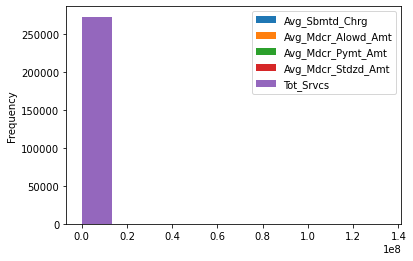

In [32]:
floattype.plot(kind='hist')

<AxesSubplot:>

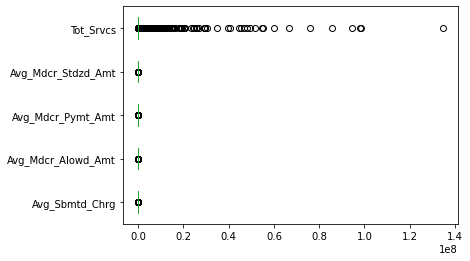

In [33]:
floattype.plot(kind='box',vert=False)

<AxesSubplot:ylabel='Density'>

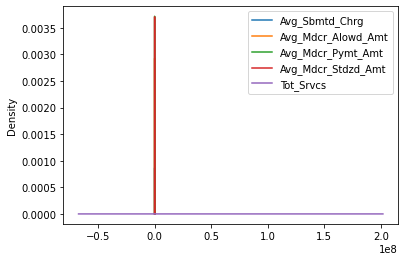

In [34]:
floattype.plot(kind='density')

<AxesSubplot:ylabel='Density'>

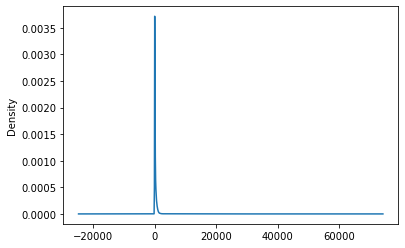

In [35]:
floattype.Avg_Mdcr_Pymt_Amt.plot(kind='density')

In [36]:
np.isinf(floattype.Avg_Mdcr_Pymt_Amt).sum()

0

<AxesSubplot:ylabel='Frequency'>

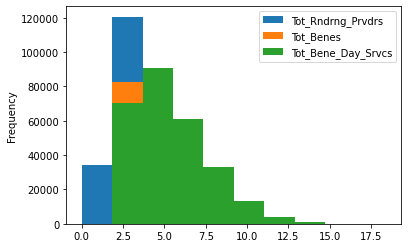

In [37]:
np.log(inttype).plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

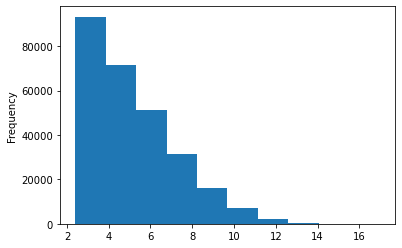

In [38]:
np.log(inttype).Tot_Benes.plot(kind='hist')

In [39]:
import seaborn as sns

<AxesSubplot:>

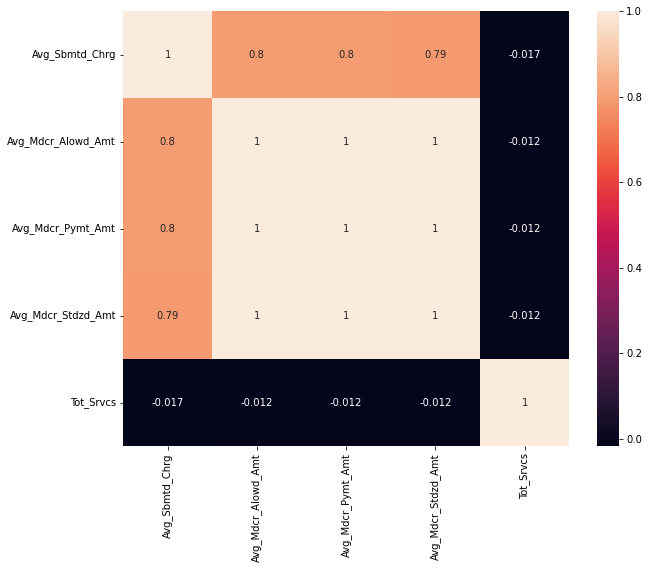

In [40]:
plt.figure(figsize=(10,8))
sns.heatmap(floattype.corr(),annot=True)

In [41]:
floattype=floattype.drop(['Avg_Mdcr_Pymt_Amt','Avg_Mdcr_Alowd_Amt'],axis=1)

In [42]:
obj=medicdata[["Rndrng_Prvdr_Geo_Lvl","Rndrng_Prvdr_Geo_Cd","Rndrng_Prvdr_Geo_Desc","HCPCS_Cd","HCPCS_Desc",
              "Place_Of_Srvc"]]

In [43]:
dep=medicdata['HCPCS_Drug_Ind']

In [44]:
from sklearn.preprocessing import LabelEncoder

In [45]:
le=LabelEncoder()

In [46]:
objdum=obj.apply(le.fit_transform)

In [47]:
total=pd.concat([floattype,objdum,inttype,dep],axis=1)

In [48]:
total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273211 entries, 0 to 273210
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Avg_Sbmtd_Chrg         273211 non-null  float64
 1   Avg_Mdcr_Stdzd_Amt     273211 non-null  float64
 2   Tot_Srvcs              273211 non-null  float64
 3   Rndrng_Prvdr_Geo_Lvl   273211 non-null  int32  
 4   Rndrng_Prvdr_Geo_Cd    273211 non-null  int32  
 5   Rndrng_Prvdr_Geo_Desc  273211 non-null  int32  
 6   HCPCS_Cd               273211 non-null  int32  
 7   HCPCS_Desc             273211 non-null  int32  
 8   Place_Of_Srvc          273211 non-null  int32  
 9   Tot_Rndrng_Prvdrs      273211 non-null  int32  
 10  Tot_Benes              273211 non-null  int32  
 11  Tot_Bene_Day_Srvcs     273211 non-null  int32  
 12  HCPCS_Drug_Ind         273211 non-null  object 
dtypes: float64(3), int32(9), object(1)
memory usage: 17.7+ MB


In [49]:
total.describe()

,Avg_Sbmtd_Chrg,Avg_Mdcr_Stdzd_Amt,Tot_Srvcs,Rndrng_Prvdr_Geo_Lvl,Rndrng_Prvdr_Geo_Cd,Rndrng_Prvdr_Geo_Desc,HCPCS_Cd,HCPCS_Desc,Place_Of_Srvc,Tot_Rndrng_Prvdrs,Tot_Benes,Tot_Bene_Day_Srvcs
count,273211.000000,273211.000000,2.732110e+05,273211.000000,273211.000000,273211.000000,273211.000000,273211.000000,273211.000000,273211.000000,2.732110e+05,2.732110e+05
mean,1251.172998,234.769057,2.372581e+04,0.952440,26.672557,31.387404,4606.456900,3869.121657,0.453444,267.382433,5.582857e+03,1.096098e+04
std,2316.386139,607.611636,6.566590e+05,0.212834,15.964892,16.545636,2603.645083,2346.748908,0.497829,3149.869990,1.180026e+05,3.415823e+05
min,0.010000,0.010000,1.100000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.100000e+01,1.100000e+01
25%,128.180000,29.230000,4.000000e+01,1.000000,13.000000,19.000000,2295.000000,1751.000000,0.000000,12.000000,3.100000e+01,3.800000e+01
50%,446.530000,91.380000,1.620000e+02,1.000000,26.000000,32.000000,5114.000000,3891.000000,0.000000,30.000000,1.090000e+02,1.440000e+02
75%,1570.305000,267.500000,1.083000e+03,1.000000,40.000000,45.000000,7006.000000,5861.000000,1.000000,98.000000,6.060000e+02,8.505000e+02
max,93181.060000,49501.500000,1.345132e+08,1.000000,61.000000,61.000000,8852.000000,7817.000000,1.000000,564937.000000,2.359469e+07,9.799789e+07


In [50]:
from scipy.stats import ttest_ind

In [51]:
total.Tot_Benes.groupby(total.HCPCS_Drug_Ind).mean()

HCPCS_Drug_Ind
N    5593.064745
Y    5370.140448
Name: Tot_Benes, dtype: float64

In [52]:
total.Tot_Benes.groupby(total.HCPCS_Drug_Ind).var()

HCPCS_Drug_Ind
N    1.425359e+10
Y    7.069448e+09
Name: Tot_Benes, dtype: float64

In [53]:
N=total[total.HCPCS_Drug_Ind=='N']
Y=total[total.HCPCS_Drug_Ind=='Y']

In [54]:
ttest_ind(N.Tot_Benes,Y.Tot_Benes,equal_var=False)

Ttest_indResult(statistic=0.2831648833347577, pvalue=0.7770543434158412)

In [55]:
total.Tot_Bene_Day_Srvcs.groupby(total.HCPCS_Drug_Ind).mean()

HCPCS_Drug_Ind
N    11080.844109
Y     8463.153557
Name: Tot_Bene_Day_Srvcs, dtype: float64

In [56]:
total.Tot_Bene_Day_Srvcs.groupby(total.HCPCS_Drug_Ind).var()

HCPCS_Drug_Ind
N    1.218215e+11
Y    9.496618e+09
Name: Tot_Bene_Day_Srvcs, dtype: float64

In [57]:
N1=total[total.HCPCS_Drug_Ind=='N']
Y1=total[total.HCPCS_Drug_Ind=='Y']

In [58]:
ttest_ind(N1.Tot_Bene_Day_Srvcs,Y1.Tot_Bene_Day_Srvcs)

Ttest_indResult(statistic=0.8372855551939118, pvalue=0.4024328090948559)

In [59]:
from scipy.stats import chi2_contingency

In [60]:
pd.crosstab(total.HCPCS_Drug_Ind,total.Place_Of_Srvc)

Place_Of_Srvc,0,1
HCPCS_Drug_Ind,,
N,148877,111824
Y,448,12062


In [61]:
chi2_contingency(pd.crosstab(total.HCPCS_Drug_Ind,total.Place_Of_Srvc))

(13797.277058344007,
 0.0,
 1,
 array([[142487.58953702, 118213.41046298],
        [  6837.41046298,   5672.58953702]]))

In [62]:
pd.crosstab(total.Rndrng_Prvdr_Geo_Lvl,total.HCPCS_Drug_Ind)

HCPCS_Drug_Ind,N,Y
Rndrng_Prvdr_Geo_Lvl,,
0,12421,573
1,248280,11937


In [63]:
chi2_contingency(pd.crosstab(total.Rndrng_Prvdr_Geo_Lvl,total.HCPCS_Drug_Ind))

(0.8532253009977158,
 0.3556415141576682,
 1,
 array([[ 12399.02051528,    594.97948472],
        [248301.97948472,  11915.02051528]]))

In [64]:
from scipy.stats import f_oneway

In [65]:
N=total[total.HCPCS_Drug_Ind=='N']
Y=total[total.HCPCS_Drug_Ind=='Y']

In [66]:
f_oneway(N.Tot_Rndrng_Prvdrs,Y.Tot_Rndrng_Prvdrs)

F_onewayResult(statistic=11.084731395378494, pvalue=0.0008705293728514848)

In [67]:
N2=total[total.HCPCS_Drug_Ind=='N']
Y2=total[total.HCPCS_Drug_Ind=='Y']

In [68]:
f_oneway(N2.Tot_Benes,Y2.Tot_Benes)

F_onewayResult(statistic=0.0426022089918076, pvalue=0.836476261470385)

In [69]:
y=total.HCPCS_Drug_Ind

In [70]:
x=total.drop(['HCPCS_Drug_Ind'],axis=1)

## In this data i have taken dependent variable as HCPCS_Drug_Ind and it has imbalance data so here i have done oversampling by using smote technique

In [71]:
total.HCPCS_Drug_Ind.value_counts()

N    260701
Y     12510
Name: HCPCS_Drug_Ind, dtype: int64

In [72]:
from imblearn.over_sampling import SMOTE

In [73]:
smote=SMOTE(random_state=42)

In [74]:
x_smote,y_smote=smote.fit_resample(x,y)

In [75]:
print(pd.DataFrame(y).value_counts())
print(pd.DataFrame(y_smote).value_counts())

HCPCS_Drug_Ind
N                 260701
Y                  12510
dtype: int64
HCPCS_Drug_Ind
N                 260701
Y                 260701
dtype: int64


In [76]:
from sklearn.linear_model import LogisticRegression

In [77]:
lr=LogisticRegression(max_iter=400)

In [78]:
logitsmote=lr.fit(x_smote,y_smote)

In [79]:
logitsmote.score(x_smote,y_smote)

0.840796544700634

In [80]:
smotepredlog=logitsmote.predict(x_smote)

In [81]:
pd.crosstab(y_smote,smotepredlog)

col_0,N,Y
HCPCS_Drug_Ind,,
N,194754,65947
Y,17062,243639


In [82]:
from sklearn.model_selection import cross_val_score

In [83]:
cross_val_score(logitsmote,x_smote,y_smote)

array([0.73931972, 0.78426559, 0.83657461, 0.85674147, 0.83830073])

In [84]:
np.mean(cross_val_score(logitsmote,x_smote,y_smote))

0.8110404227362624

In [85]:
from sklearn.metrics import classification_report

In [86]:
print(classification_report(y_smote,smotepredlog))

              precision    recall  f1-score   support

           N       0.92      0.75      0.82    260701
           Y       0.79      0.93      0.85    260701

    accuracy                           0.84    521402
   macro avg       0.85      0.84      0.84    521402
weighted avg       0.85      0.84      0.84    521402



In [87]:
from sklearn.metrics import plot_roc_curve

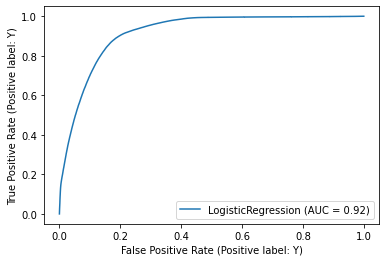

In [88]:
plot_roc_curve(logitsmote,x_smote,y_smote)

In [89]:
from sklearn.tree import DecisionTreeClassifier

In [90]:
dtreesmote=DecisionTreeClassifier(max_depth=4)

In [91]:
dtmodel=dtreesmote.fit(x_smote,y_smote)

In [92]:
dtmodel.score(x_smote,y_smote)

0.9866897326822682

In [93]:
dtpredict=dtmodel.predict(x_smote)

In [94]:
pd.crosstab(y_smote,dtpredict)

col_0,N,Y
HCPCS_Drug_Ind,,
N,258341,2360
Y,4580,256121


In [95]:
print(classification_report(y_smote,dtpredict))

              precision    recall  f1-score   support

           N       0.98      0.99      0.99    260701
           Y       0.99      0.98      0.99    260701

    accuracy                           0.99    521402
   macro avg       0.99      0.99      0.99    521402
weighted avg       0.99      0.99      0.99    521402



In [96]:
cross_val_score(dtreesmote,x_smote,y_smote)

array([0.98599937, 0.98601855, 0.98702532, 0.98716916, 0.98717875])

In [97]:
np.mean(cross_val_score(dtreesmote,x_smote,y_smote))

0.9866782278137454

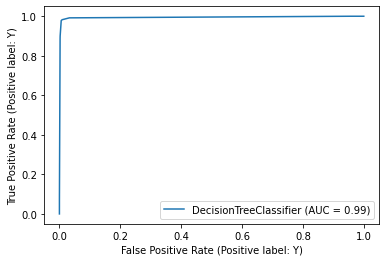

In [98]:
plot_roc_curve(dtreesmote,x_smote,y_smote)

In [99]:
from sklearn.ensemble import RandomForestClassifier

In [100]:
rfsmote=RandomForestClassifier(max_depth=4,n_estimators=3)

In [101]:
rfmodel=rfsmote.fit(x_smote,y_smote)

In [102]:
rfmodel.score(x_smote,y_smote)

0.9729536902428453

In [103]:
rfpre=rfmodel.predict(x_smote)

In [104]:
cross_val_score(rfmodel,x_smote,y_smote)

array([0.75122026, 0.96048178, 0.98211546, 0.95347142, 0.93135788])

In [105]:
np.mean(cross_val_score(rfmodel,x_smote,y_smote))

0.9088726594173548

In [106]:
pd.crosstab(y_smote,rfpre)

col_0,N,Y
HCPCS_Drug_Ind,,
N,251298,9403
Y,4699,256002


In [107]:
print(classification_report(y_smote,rfpre))

              precision    recall  f1-score   support

           N       0.98      0.96      0.97    260701
           Y       0.96      0.98      0.97    260701

    accuracy                           0.97    521402
   macro avg       0.97      0.97      0.97    521402
weighted avg       0.97      0.97      0.97    521402



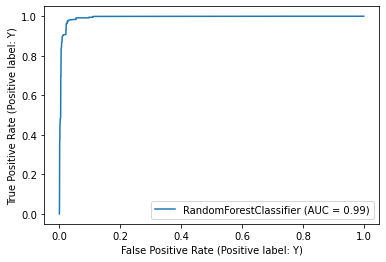

In [108]:
plot_roc_curve(rfmodel,x_smote,y_smote)

In [109]:
from sklearn.ensemble import GradientBoostingClassifier

In [110]:
gbmsmote=GradientBoostingClassifier()

In [111]:
gbmmodel=gbmsmote.fit(x_smote,y_smote)

In [112]:
gbmmodel.score(x_smote,y_smote)

0.9970003950886265

In [113]:
gbmpre=gbmmodel.predict(x_smote)

In [114]:
cross_val_score(gbmmodel,x_smote,y_smote)

array([0.97691813, 0.996356  , 0.99722862, 0.9967875 , 0.99649022])

In [181]:
np.mean([0.97691813, 0.996356  , 0.99722862, 0.9967875 , 0.99649022])

0.992756094

In [116]:
pd.crosstab(y_smote,gbmpre)

col_0,N,Y
HCPCS_Drug_Ind,,
N,259566,1135
Y,429,260272


In [117]:
print(classification_report(y_smote,gbmpre))

              precision    recall  f1-score   support

           N       1.00      1.00      1.00    260701
           Y       1.00      1.00      1.00    260701

    accuracy                           1.00    521402
   macro avg       1.00      1.00      1.00    521402
weighted avg       1.00      1.00      1.00    521402



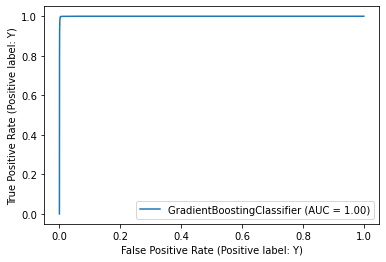

In [118]:
plot_roc_curve(gbmmodel,x_smote,y_smote)

### After this three model predictions i have predicted the base values of all the reports based on the output values

In [120]:
textdata=medicdata.HCPCS_Desc

In [121]:
textdata.shape

(273211,)

In [122]:
import re

In [123]:
def clean_tweet(text):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\s+)|([0-9])"," ",text).split())

In [124]:
medictext=[str(clean_tweet(text)) for text in textdata]

In [125]:
medictext

['Liver disease ten biochemical assays alt a macroglobulin apolipoprotein a total bilirubin ggt haptoglobin ast glucose total cholesterol and triglycerides utilizing serum prognostic algorithm reported as quantitative scores for fibrosis stea',
 'Test for detecting genes associated with prostate cancer in urine',
 'Anesthesia for procedure on salivary gland with biopsy',
 'Anesthesia for procedure on salivary gland with biopsy',
 'Anesthesia for procedure to repair lip defect present at birth',
 'Anesthesia for procedure on eyelid',
 'Anesthesia for procedure on eyelid',
 'Anesthesia for electric shock treatment',
 'Anesthesia for electric shock treatment',
 'Anesthesia for biopsy of external middle and inner ear',
 'Anesthesia for biopsy of external middle and inner ear',
 'Anesthesia for examination and biopsy of external middle and inner ear using an endoscope',
 'Anesthesia for examination and biopsy of external middle and inner ear using an endoscope',
 'Anesthesia for incision of

In [126]:
textdata=pd.DataFrame(textdata)

In [127]:
textdata.columns=['uday']

In [128]:
textdata.uday=textdata.uday.str.lower()

In [129]:
from nltk.corpus import stopwords

In [130]:
stop_words=set(stopwords.words('english'))

In [131]:
textwords=textdata.uday.str.split()

In [132]:
textwords=textdata.uday.str.findall('\w{3,}').str.join(' ')

In [133]:
textwords

0         liver disease ten biochemical assays alt macro...
1         test for detecting genes associated with prost...
2         anesthesia for procedure salivary gland with b...
3         anesthesia for procedure salivary gland with b...
4         anesthesia for procedure repair lip defect pre...
                                ...                        
273206    moderate sedation services provided the same p...
273207                 injection ceftriaxone sodium per 250
273208                 injection methylprednisolone acetate
273209             injection dexamethasone sodium phosphate
273210    injection triamcinolone acetonide not otherwis...
Name: uday, Length: 273211, dtype: object

In [134]:
!pip install wordCloud

In [135]:
from wordcloud import WordCloud

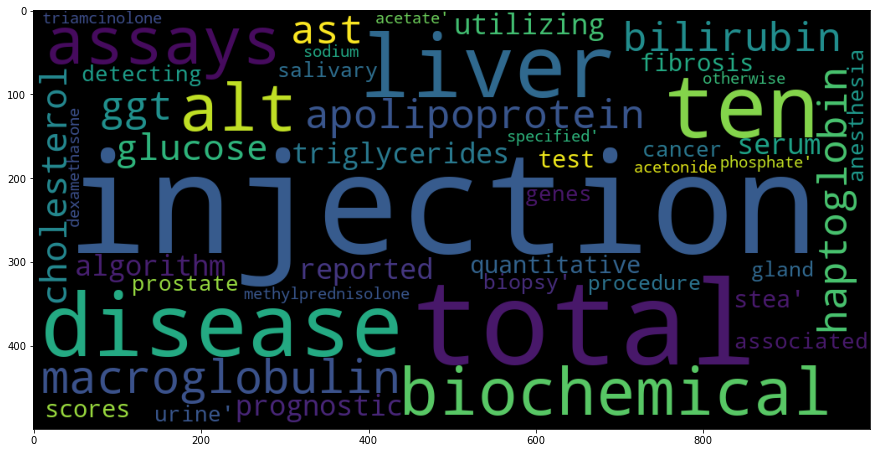

In [136]:
wordcloud=WordCloud(width=1000,height=500,
                   stopwords=stop_words,max_words=1000).generate(
    str(textwords.values))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.show()

In [137]:
from sklearn.feature_extraction.text import CountVectorizer

In [138]:
vectorizer=CountVectorizer(stop_words=stop_words,max_features=300)

In [139]:
final=vectorizer.fit_transform(textwords)

In [140]:
finaldata=pd.DataFrame(final.toarray(),columns=vectorizer.vocabulary_)

In [141]:
finaldata.value_counts()

liver  total  test  prostate  cancer  urine  anesthesia  procedure  gland  biopsy  repair  defect  eyelid  treatment  external  middle  ear  examination  using  endoscope  incision  eye  lens  surgery  removal  nose  sinus  tissue  mouth  including  tumor  blood  system  bone  analysis  thyroid  bones  brain  fluid  ray  imaging  fracture  vessel  patient  spinal  cord  nerve  non  small  cell  lung  measurement  esophagus  neck  drug  age  older  needle  vessels  skin  arms  legs  trunk  breast  lymph  nodes  abnormal  heart  rhythm  flow  contrast  shoulder  partial  chest  wall  testing  closed  drainage  diagnostic  insertion  permanent  pacemaker  central  vein  defibrillator  lining  fluoroscopic  guidance  artery  bypass  virus  upper  spine  lower  nerves  manipulation  antibody  abdominal  accessed  stomach  bowel  bile  hernia  wound  opening  catheter  open  supervision  interpretation  abdomen  use  management  protein  large  cavity  rectum  uterus  pelvic  urinary  tract 

In [142]:
objdum=objdum.drop(['HCPCS_Desc'],axis=1)

In [143]:
objdum.shape

(273211, 5)

In [144]:
nlptext=pd.concat([objdum,floattype,dep,finaldata],axis=1)

In [145]:
nlptext.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273211 entries, 0 to 273210
Columns: 309 entries, Rndrng_Prvdr_Geo_Lvl to subsequent
dtypes: float64(3), int32(5), int64(300), object(1)
memory usage: 638.9+ MB


In [146]:
nlptext.describe()

,Rndrng_Prvdr_Geo_Lvl,Rndrng_Prvdr_Geo_Cd,Rndrng_Prvdr_Geo_Desc,HCPCS_Cd,Place_Of_Srvc,Avg_Sbmtd_Chrg,Avg_Mdcr_Stdzd_Amt,Tot_Srvcs,liver,total,...,established,programming,qualified,professional,nursing,facility,typically,office,initial,subsequent
count,273211.000000,273211.000000,273211.000000,273211.000000,273211.000000,273211.000000,273211.000000,2.732110e+05,273211.000000,273211.000000,...,273211.000000,273211.000000,273211.000000,273211.000000,273211.000000,273211.000000,273211.000000,273211.000000,273211.000000,273211.000000
mean,0.952440,26.672557,31.387404,4606.456900,0.453444,1251.172998,234.769057,2.372581e+04,0.005197,0.008755,...,0.011471,0.011628,0.026412,0.007441,0.014366,0.004191,0.004886,0.021939,0.009333,0.010227
std,0.212834,15.964892,16.545636,2603.645083,0.497829,2316.386139,607.611636,6.566590e+05,0.076158,0.093159,...,0.109704,0.107206,0.165036,0.094617,0.125580,0.064601,0.069731,0.146485,0.096234,0.100608
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.010000,1.100000e+01,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,13.000000,19.000000,2295.000000,0.000000,128.180000,29.230000,4.000000e+01,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,26.000000,32.000000,5114.000000,0.000000,446.530000,91.380000,1.620000e+02,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,40.000000,45.000000,7006.000000,1.000000,1570.305000,267.500000,1.083000e+03,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,61.000000,61.000000,8852.000000,1.000000,93181.060000,49501.500000,1.345132e+08,2.000000,1.000000,...,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000


In [147]:
yy=nlptext.HCPCS_Drug_Ind

In [148]:
xx=nlptext.drop(['HCPCS_Drug_Ind'],axis=1)

In [149]:
xx_smote,yy_smote=smote.fit_resample(xx,yy)

In [150]:
print(pd.DataFrame(yy).value_counts())
print(pd.DataFrame(yy_smote).value_counts())

HCPCS_Drug_Ind
N                 260701
Y                  12510
dtype: int64
HCPCS_Drug_Ind
N                 260701
Y                 260701
dtype: int64


In [151]:
logitnlp=lr.fit(xx_smote,yy_smote)

In [152]:
logitnlp.score(xx_smote,yy_smote)

0.837240747062727

In [153]:
logitnlppre=logitnlp.predict(xx_smote)

In [154]:
cross_val_score(logitnlp,xx_smote,yy_smote)

array([0.70589081, 0.75160384, 0.80472766, 0.84190641, 0.8323552 ])

In [155]:
np.mean([0.70589081, 0.75160384, 0.80472766, 0.84190641, 0.8323552 ])

0.787296784

In [156]:
pd.crosstab(yy_smote,logitnlppre)

col_0,N,Y
HCPCS_Drug_Ind,,
N,183705,76996
Y,7867,252834


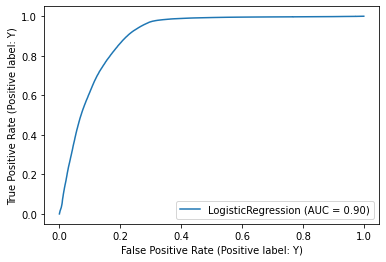

In [157]:
plot_roc_curve(logitnlp,xx_smote,yy_smote)

In [158]:
dtnlp=dtreesmote.fit(xx_smote,yy_smote)

In [159]:
dtnlp.score(xx_smote,yy_smote)

0.989033413757523

In [160]:
dtnlppre=dtnlp.predict(xx_smote)

In [161]:
cross_val_score(dtnlp,xx_smote,yy_smote)

array([0.98845427, 0.98874196, 0.98924051, 0.9890583 , 0.98909666])

In [162]:
np.mean([0.98845427, 0.98874196, 0.98924051, 0.9890583 , 0.98909666])

0.98891834

In [163]:
pd.crosstab(yy_smote,dtnlppre)

col_0,N,Y
HCPCS_Drug_Ind,,
N,259219,1482
Y,4236,256465


In [164]:
print(classification_report(yy_smote,dtnlppre))

              precision    recall  f1-score   support

           N       0.98      0.99      0.99    260701
           Y       0.99      0.98      0.99    260701

    accuracy                           0.99    521402
   macro avg       0.99      0.99      0.99    521402
weighted avg       0.99      0.99      0.99    521402



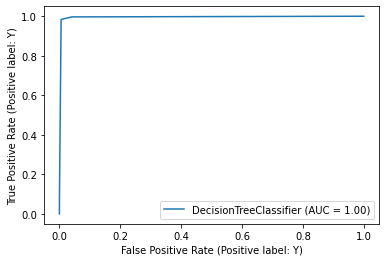

In [165]:
plot_roc_curve(dtnlp,xx_smote,yy_smote)

In [166]:
rfnlp=rfsmote.fit(xx_smote,yy_smote)

In [167]:
rfnlp.score(xx_smote,yy_smote)

0.8631094625643937

In [168]:
rfnlppre=rfnlp.predict(xx_smote)

In [169]:
cross_val_score(rfnlp,xx_smote,yy_smote)

array([0.86936259, 0.8680776 , 0.84835059, 0.75981972, 0.77770426])

In [180]:
np.mean([0.86936259, 0.8680776 , 0.84835059, 0.75981972, 0.77770426])

0.824662952

In [171]:
pd.crosstab(yy_smote,rfnlppre)

col_0,N,Y
HCPCS_Drug_Ind,,
N,224689,36012
Y,35363,225338


In [172]:
print(classification_report(yy_smote,rfnlppre))

              precision    recall  f1-score   support

           N       0.86      0.86      0.86    260701
           Y       0.86      0.86      0.86    260701

    accuracy                           0.86    521402
   macro avg       0.86      0.86      0.86    521402
weighted avg       0.86      0.86      0.86    521402



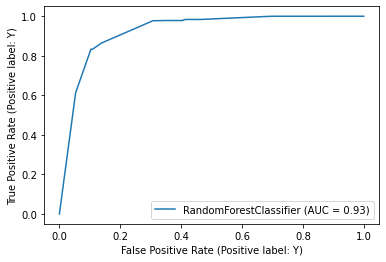

In [173]:
plot_roc_curve(rfnlp,xx_smote,yy_smote)

In [174]:
gbmnlp=gbmsmote.fit(xx_smote,yy_smote)

In [175]:
gbmnlp.score(xx_smote,yy_smote)

0.9959704795915627

In [176]:
gbmnlppre=gbmnlp.predict(xx_smote)

In [177]:
cross_val_score(gbmnlp,xx_smote,yy_smote)

array([0.98849263, 0.99584776, 0.99618335, 0.99656694, 0.99368048])

In [178]:
np.mean([0.98849263, 0.99584776, 0.99618335, 0.99656694, 0.99368048])

0.994154232

In [179]:
pd.crosstab(yy_smote,gbmnlppre)

col_0,N,Y
HCPCS_Drug_Ind,,
N,259446,1255
Y,846,259855


## Report

* Based on the probabilities,classification report and Type 2 error gradient boosting method is best fit for this data compared to other probabilities 